In [10]:
from virusPropagationModel import *
import matplotlib.pyplot as plt
import pandas as pd
import os
import pickle as pkl
import networkx as nx
import numpy as np
import math
import seaborn as sns
%matplotlib inline

In [11]:
folder = 'saved_objects/Gangelt_big_RPM_02/'
file = 'Gangelt_big_RPM_02_uninfected_worldObj.pkl'
world = load_simulation_object(file, folder=folder)

In [12]:
homes_dict = {}
for p in world.people:
    homes_dict[p.ID]=p.home.ID
    #if p.home.ID in homes_dict.keys():
     #   homes_dict[p.home.ID].append(p.ID)
    #else:
     #   homes_dict[p.home.ID]=[p.ID]
#homes_dict

In [13]:
input_folder = '/home/basar/corona_simulations_save/saved_objects/scenario_output/RPM02_Gangelt_big_Ifreq_2.0_close_all_reopen_all_IF03_start_3_1500.000/'

In [14]:
input_list = os.listdir(input_folder)
input_files = [x for x in input_list if x.endswith('pkl')]

In [34]:
infected_homes_1 = []
infected_homes_2 = []
timepoint = 200
ihome_sizes_1 = []
ihome_sizes_2 = []

for file in input_files[:]:
    tdf = pd.read_pickle('analysis_temp/TIMES_'+file)
    
    tdf_short = tdf[(tdf['infection_time']>0) & (tdf['infection_time']<=timepoint)]
    tdf_short = tdf_short[tdf_short['recovery_time']>timepoint]
    tdf_short = tdf_short[(tdf_short['death_time'].isna()) | (tdf_short['death_time']>timepoint)]
    
    if len(tdf_short)==0:
        #infected_homes_1.append(0.0)
        continue
    
    tdf_short['home']=tdf_short.apply(lambda x: homes_dict[x.name], axis=1)
    homes = tdf_short['home'].unique()
    infected_homes=len(homes)
    
    #break
    
    if tdf['infection_time'].isna().sum()>4000:
        #print(tdf['infection_time'].isna().sum())
        infected_homes_1.append(infected_homes)
        ihome_sizes_1.append(np.mean([home_sizes[i] for i in homes]))
    else:
        ihome_sizes_2.append(np.mean([home_sizes[i] for i in homes]))
        infected_homes_2.append(infected_homes)

In [36]:
ihome_sizes_1

[2.3333333333333335,
 2.7714285714285714,
 2.6363636363636362,
 2.6,
 2.5,
 2.9473684210526314,
 2.847826086956522,
 2.7346938775510203,
 2.5238095238095237,
 2.810344827586207,
 2.9615384615384617,
 2.6956521739130435,
 2.7115384615384617,
 2.3076923076923075,
 2.8333333333333335,
 2.9166666666666665,
 3.085714285714286,
 2.909090909090909,
 3.1944444444444446,
 2.5853658536585367,
 2.697674418604651,
 2.0,
 2.4814814814814814,
 2.813953488372093,
 2.6216216216216215,
 2.840909090909091,
 2.9649122807017543,
 2.5,
 3.272727272727273,
 2.142857142857143,
 2.3666666666666667,
 2.5531914893617023,
 2.6666666666666665,
 2.4210526315789473,
 2.9130434782608696,
 2.8125,
 2.5641025641025643,
 3.0588235294117645,
 2.5,
 2.588235294117647,
 2.857142857142857,
 2.7457627118644066,
 2.6363636363636362,
 2.5714285714285716,
 2.878787878787879,
 2.736842105263158,
 3.0,
 2.4166666666666665,
 3.018867924528302,
 2.8450704225352115,
 2.303030303030303,
 2.888888888888889,
 2.6984126984126986,
 2.72

Text(0.5, 1.0, 'mean infected home size at lockdown')

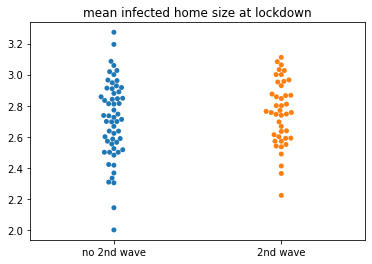

In [37]:
fig = plt.figure()

ax = sns.swarmplot(data=[ihome_sizes_1,ihome_sizes_2])
#plt.violinplot(infected_homes_1, positions=[1])
#plt.violinplot(infected_homes_2, positions=[2])
plt.xticks([0,1],['no 2nd wave','2nd wave'])
plt.title('mean infected home size at lockdown')

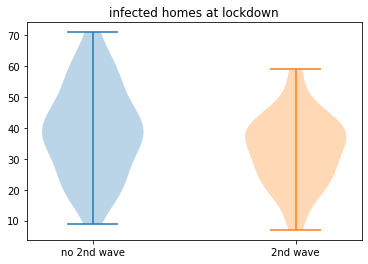

In [27]:
fig = plt.figure()

plt.violinplot(infected_homes_1, positions=[1])
plt.violinplot(infected_homes_2, positions=[2])
plt.xticks([1,2],['no 2nd wave','2nd wave'])
plt.title('infected homes at lockdown')
fig.savefig('infected_homes_at_lockdown')

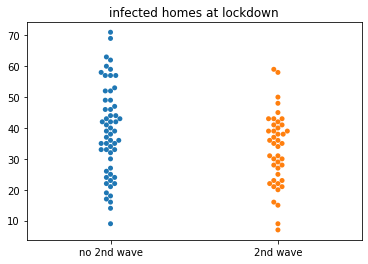

In [28]:
fig = plt.figure()

ax = sns.swarmplot(data=[infected_homes_1,infected_homes_2])
#plt.violinplot(infected_homes_1, positions=[1])
#plt.violinplot(infected_homes_2, positions=[2])
plt.xticks([0,1],['no 2nd wave','2nd wave'])
plt.title('infected homes at lockdown')
fig.savefig('infected_homes_at_lockdown_swarm')

In [38]:
infected_homes_1 = []
infected_homes_2 = []
timepoint = 1500
ihome_sizes_1 = []
ihome_sizes_2 = []

for file in input_files[:]:
    tdf = pd.read_pickle('analysis_temp/TIMES_'+file)
    
    tdf_short = tdf[(tdf['infection_time']>0) & (tdf['infection_time']<=timepoint)]
    tdf_short = tdf_short[tdf_short['recovery_time']>timepoint]
    tdf_short = tdf_short[(tdf_short['death_time'].isna()) | (tdf_short['death_time']>timepoint)]
    
    if len(tdf_short)==0:
        #infected_homes_1.append(0.0)
        continue
    
    tdf_short['home']=tdf_short.apply(lambda x: homes_dict[x.name], axis=1)
    homes = tdf_short['home'].unique()
    infected_homes=len(homes)
    
    #break
    
    if tdf['infection_time'].isna().sum()>4000:
        #print(tdf['infection_time'].isna().sum())
        infected_homes_1.append(infected_homes)
        ihome_sizes_1.append(np.mean([home_sizes[i] for i in homes]))
    else:
        ihome_sizes_2.append(np.mean([home_sizes[i] for i in homes]))
        infected_homes_2.append(infected_homes)

Text(0.5, 1.0, 'mean infected home size at reopening')

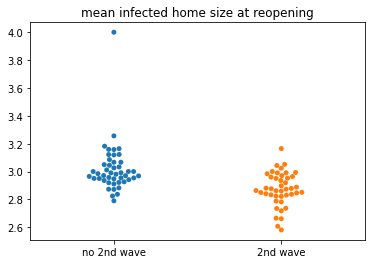

In [39]:
fig = plt.figure()

ax = sns.swarmplot(data=[ihome_sizes_1,ihome_sizes_2])
#plt.violinplot(infected_homes_1, positions=[1])
#plt.violinplot(infected_homes_2, positions=[2])
plt.xticks([0,1],['no 2nd wave','2nd wave'])
plt.title('mean infected home size at reopening')

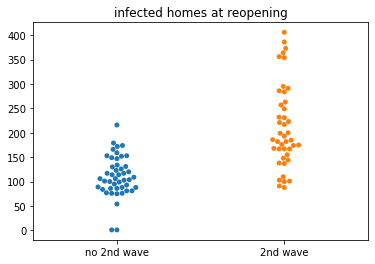

In [30]:
fig = plt.figure()

ax = sns.swarmplot(data=[infected_homes_1,infected_homes_2])
#plt.violinplot(infected_homes_1, positions=[1])
#plt.violinplot(infected_homes_2, positions=[2])
plt.xticks([0,1],['no 2nd wave','2nd wave'])
plt.title('infected homes at reopening')
fig.savefig('infected_homes_at_reopening_swarm')

In [23]:
home_sizes = {}
for hid in homes_dict.values():
    home_sizes[hid] = sum(value == hid for value in homes_dict.values())
home_sizes

{1785: 4,
 3961: 2,
 2520: 3,
 3860: 3,
 3861: 4,
 1291: 3,
 3962: 1,
 2521: 3,
 847: 2,
 580: 2,
 1786: 3,
 3963: 2,
 307: 4,
 1290: 2,
 3964: 3,
 3862: 1,
 581: 1,
 3863: 1,
 3864: 2,
 3965: 3,
 678: 4,
 848: 1,
 3865: 1,
 1787: 2,
 3966: 4,
 3866: 2,
 984: 1,
 849: 1,
 3867: 1,
 3868: 1,
 850: 1,
 1293: 2,
 3869: 3,
 308: 2,
 985: 4,
 2522: 1,
 1788: 1,
 851: 1,
 2523: 2,
 3870: 1,
 1789: 1,
 852: 2,
 3716: 3,
 2579: 3,
 4701: 3,
 965: 2,
 293: 4,
 1202: 6,
 3717: 2,
 4863: 2,
 2580: 1,
 4702: 2,
 2581: 1,
 901: 3,
 3718: 2,
 4864: 1,
 2582: 1,
 4865: 1,
 294: 3,
 3719: 1,
 902: 1,
 750: 1,
 4866: 1,
 571: 3,
 966: 1,
 3720: 1,
 4867: 1,
 903: 1,
 3721: 1,
 2583: 1,
 4868: 3,
 4703: 2,
 3722: 1,
 967: 1,
 3723: 1,
 904: 1,
 4869: 1,
 4704: 4,
 3724: 2,
 572: 2,
 4061: 4,
 4870: 2,
 1275: 3,
 3725: 2,
 1163: 5,
 2584: 1,
 1203: 2,
 1276: 1,
 295: 2,
 4705: 1,
 3726: 2,
 2585: 2,
 4706: 2,
 573: 1,
 3727: 5,
 4871: 2,
 460: 2,
 2473: 2,
 753: 3,
 32: 1,
 3553: 4,
 559: 1,
 422: 6,
 29